# Todoist Completed Task Analysis for Jan 11, 2021 to Sep 24, 2021

In [156]:
from todoist.api import TodoistAPI
import datetime
import pytz
import pandas as pd
import configparser

In [157]:
pd.set_option('display.max_rows', 500)
config = configparser.ConfigParser()
config.read('config.ini')
token = config["TODOIST"]["token"]

In [ ]:
api = TodoistAPI(token)
api.sync()

In [160]:
#set timezone, and start and end dates

timezone = pytz.timezone("America/Jamaica")
start_datetime_str = "2021-01-01 00:00"
end_datetime_str = "2021-09-26 00:00"
start_datetime = datetime.datetime.strptime(start_datetime_str, "%Y-%m-%d %H:%M").replace(tzinfo=timezone)
end_datetime = datetime.datetime.strptime(end_datetime_str, "%Y-%m-%d %H:%M").replace(tzinfo=timezone)

In [161]:
#fetch the data from Todoist

in_range = True
since_dt = start_datetime
until_dt = start_datetime + datetime.timedelta(days=7)

completed_items = []
while in_range:
    since = since_dt.astimezone(pytz.utc).strftime("%Y-%m-%dT%H:%M")
    until = until_dt.astimezone(pytz.utc).strftime("%Y-%m-%dT%H:%M")
    items = api.completed.get_all(limit=200, since=since, until=until)["items"]
    completed_items += items
    if until_dt >= end_datetime:
        in_range = False
    since_dt += datetime.timedelta(days=7)
    until_dt += datetime.timedelta(days=7)
    
    
    

In [162]:
len(completed_items)

1339

In [163]:
def getDT(item):
    completed_date = item["completed_date"]
    completed_datetime = datetime.datetime.strptime(completed_date, "%Y-%m-%dT%H:%M:%SZ")
    completed_datetime = completed_datetime.replace(tzinfo=pytz.UTC)
    completed_datetime = completed_datetime.astimezone(timezone)
    return getWeek(completed_datetime)

def getWeek(dt):
    start = dt - datetime.timedelta(days=dt.weekday())
    end = start + datetime.timedelta(days=6)
    week_str = start.strftime("%b %d-") + end.strftime("%b %d")
    week_num = int(start.strftime("%V"))
    return (week_num, week_str)
    
    

In [164]:
task_distribution = {}
for item in completed_items:
    dt = getDT(item)
    if dt not in task_distribution:
        task_distribution[dt] = 1
    else:
        task_distribution[dt] += 1

lst = list(task_distribution.keys())
lst.sort()
keys = list(map(lambda item: item[1], lst))
values = list(map(lambda item: task_distribution[item], lst))

In [168]:
data = {"Week": keys[:-1], "Number of Tasks Completed": values[:-1]}

In [169]:
df = pd.DataFrame(data,columns=['Week','Number of Tasks Completed'])
df

,Week,Number of Tasks Completed
0,Jan 11-Jan 17,19
1,Jan 18-Jan 24,44
2,Jan 25-Jan 31,43
3,Feb 01-Feb 07,55
4,Feb 08-Feb 14,56
5,Feb 15-Feb 21,37
6,Feb 22-Feb 28,49
7,Mar 01-Mar 07,38
8,Mar 08-Mar 14,18
9,Mar 15-Mar 21,26


<AxesSubplot:ylabel='Week'>

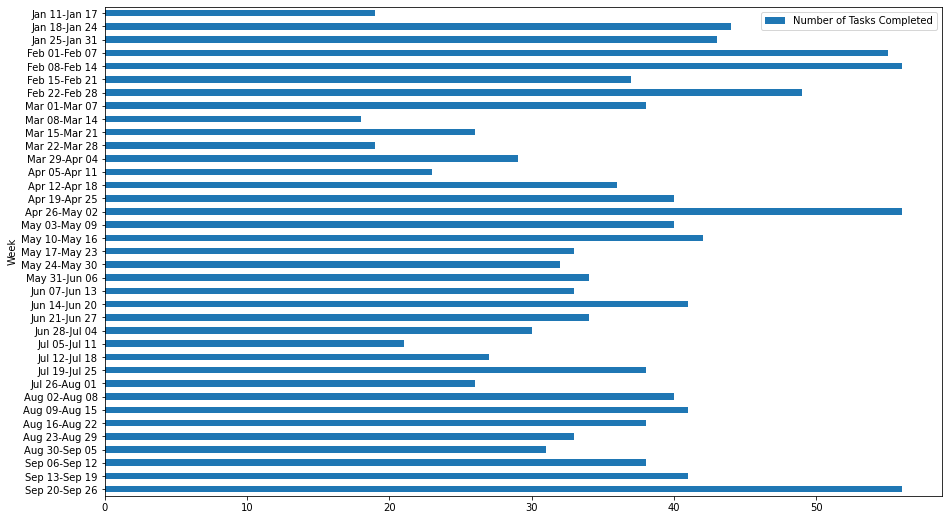

In [170]:
df = df.iloc[::-1]
df.plot.barh(y="Number of Tasks Completed", x="Week", figsize=(15,9))